## Refaça a analise do exercicio de classificacao supervisionada, incluindo o PCA.

## Plote a curva explained_variance_ratio para encontrar uma quantidade de componentes que explique perto de 90% da variancia

In [64]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np

## MNIST

In [65]:
df = pd.read_csv("./../mnist_train.csv",sep=",")

In [66]:
dfs = df.sample(n=3000)

In [67]:
dfs.label.value_counts()

1    342
4    315
6    312
2    303
9    298
0    298
7    297
3    292
8    291
5    252
Name: label, dtype: int64

In [68]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 41947 to 26853
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 18.0 MB


In [69]:
X = dfs.drop(['label'], axis=1)
y = dfs['label']

### Curva explained_variance_ratio  (n_components ideal = 400)

Text(0, 0.5, 'cumulative explained variance')

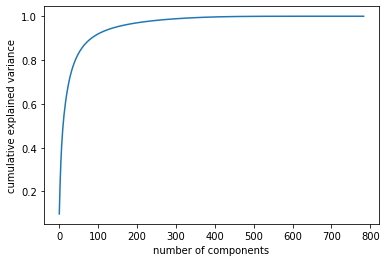

In [70]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [71]:
ncomp = 400
pca = PCA(n_components=400)
pca.fit(X)
X_pca = pca.transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [73]:
pknn = Pipeline([('scl', StandardScaler()), ('rgs', KNeighborsClassifier(n_neighbors=3))])
pknnpca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', KNeighborsClassifier(n_neighbors=3))])
ptree = Pipeline([('scl', StandardScaler()), ('rgs', DecisionTreeClassifier())])
psgdr = Pipeline([('scl', StandardScaler()), ('rgs', SGDClassifier())])
ptreepca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', DecisionTreeClassifier())])
psgdrpca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', SGDClassifier())])

pipelines = [pknn, pknnpca, ptree,ptreepca, psgdr, psgdrpca]

pipe_names = {0:"Knn", 1:"Knn PCA", 2:"Tree", 3:"Tree PCA", 4:"SGDR", 5:"SGDR PCA"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

print("    Test Accuracy\n")
scores = []
for idx, val in enumerate(pipelines):
    sc = val.score(X_test, y_test)
    scores.append(sc)
    print("%s: %.3f" % (pipe_names[idx], sc))
    
max_ind = scores.index(max(scores))
print("\nRegression with best accuracy: ", pipe_names[max_ind])

    Test Accuracy

Knn: 0.871
Knn PCA: 0.872
Tree: 0.694
Tree PCA: 0.639
SGDR: 0.879
SGDR PCA: 0.873

Regression with best accuracy:  SGDR


## RUMO 

In [40]:
df = pd.read_csv("./../tempo_previsao.csv",sep=',')
df.columns

Index(['OS', 'TB_TOTAL', 'COMP_TOTAL', 'PREFIXO', 'DTINICIO', 'DTFIM',
       'TEMPO_TOTAL', 'N_SECOES', 'SENTIDO', 'TEMPO_PREVISAO',
       'TEMPO_PREVISAO_PC'],
      dtype='object')

In [41]:
le = preprocessing.LabelEncoder()
df["SENTIDO"] = le.fit_transform(df["SENTIDO"])
df.head()

,OS,TB_TOTAL,COMP_TOTAL,PREFIXO,DTINICIO,DTFIM,TEMPO_TOTAL,N_SECOES,SENTIDO,TEMPO_PREVISAO,TEMPO_PREVISAO_PC
0,1602551,2093.51,1252.330,M07,2019-09-12 09:42:00,2019-09-13 06:45:00,75780.0,89,0,82945.390109,83823.0
1,1660144,19317.38,3117.809,X88,2019-09-01 00:11:00,2019-09-04 05:02:00,276660.0,52,1,102336.307077,103852.0
2,1663573,18582.50,2758.702,X60,2019-09-01 00:24:00,2019-09-01 21:46:00,76920.0,40,1,65014.288616,65964.0
3,1663574,23425.48,3479.992,X62,2019-09-01 00:03:00,2019-09-01 16:05:00,57720.0,29,1,50915.442958,51721.0
4,1663576,22854.98,3318.502,X66,2019-09-01 01:02:00,2019-09-02 03:10:00,94080.0,41,1,72409.011027,73544.0


In [42]:
df = df.drop(["PREFIXO","DTINICIO","DTFIM"], axis=1)
df

,OS,TB_TOTAL,COMP_TOTAL,TEMPO_TOTAL,N_SECOES,SENTIDO,TEMPO_PREVISAO,TEMPO_PREVISAO_PC
0,1602551,2093.510,1252.330,75780.0,89,0,82945.390109,83823.0
1,1660144,19317.380,3117.809,276660.0,52,1,102336.307077,103852.0
2,1663573,18582.500,2758.702,76920.0,40,1,65014.288616,65964.0
3,1663574,23425.480,3479.992,57720.0,29,1,50915.442958,51721.0
4,1663576,22854.980,3318.502,94080.0,41,1,72409.011027,73544.0
...,...,...,...,...,...,...,...,...
3051,1670428,1015.620,568.289,15960.0,27,0,17336.420555,17515.0
3052,1670429,1118.510,661.329,15600.0,27,0,17122.933041,17299.0
3053,1670474,1941.221,460.330,7080.0,5,0,6353.609350,6420.0
3054,1670494,3036.375,1473.591,19260.0,21,0,23578.550475,23834.0


### Curva explained_variance_ratio  (n_components ideal = 4)

In [43]:
X = df.drop(["TEMPO_PREVISAO"], axis=1)
y = df["TEMPO_PREVISAO"]

Text(0, 0.5, 'cumulative explained variance')

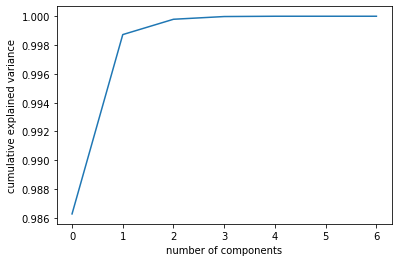

In [44]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [45]:
ncomp = 4
pca = PCA(n_components=ncomp)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

In [46]:
pknn = Pipeline([('scl', StandardScaler()), ('rgs', KNeighborsRegressor(n_neighbors=3))])
pknnpca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', KNeighborsRegressor(n_neighbors=3))])
ptree = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', DecisionTreeRegressor())])
psgdr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', SGDRegressor())])

pipelines = [pknn, pknnpca, ptree, psgdr]

pipe_names = {0:"KNN", 1:"KNN PCA", 2:"Árvore de Decisão PCA", 3:"SGDR PCA"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

print("    Test Accuracy\n")
scores = []
for idx, val in enumerate(pipelines):
    sc = val.score(X_test, y_test)
    scores.append(sc)
    print("%s: %.3f" % (pipe_names[idx], sc))
    
max_ind = scores.index(max(scores))
print("\nRegression with best accuracy: ", pipe_names[max_ind])

    Test Accuracy

KNN: 0.993
KNN PCA: 0.991
Árvore de Decisão PCA: 0.983
SGDR PCA: 0.979

Regression with best accuracy:  KNN


In [47]:
pknnpca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', KNeighborsRegressor(n_neighbors=3))])
ptreepca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', DecisionTreeRegressor())])
psgdrpca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', SGDRegressor())])

pipelines = [pknnpca, ptreepca, psgdrpca]

pipe_names = {0:"Knn PCA", 1:"Tree PCA", 2:"SGDR PCA"}

param_dict = {"pca__n_components":[1, 7]}

for pipe in pipelines:
    estimator = GridSearchCV(pipe, param_dict)
    #pipe.fit(X_train, y_train)
    estimator.fit(X_train, y_train)
    print(estimator.best_params_)

/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'pca__n_components': 7}
{'pca__n_components': 7}
{'pca__n_components': 7}


#### Resultados
* Aplicando o GridSearch no parâmetro de número de componentes do PCA, é obtido como melhor valor o número máximo de atributos n_components = 8.

* Entretanto, é possível manter a acurácia muito próxima com metade do número de atributos n_components=4.


## VELTEC

In [48]:
df = pd.read_csv("./../vigencias_scores.csv",sep=',')
df.columns

Index(['id_vei', 'id_uo_vei', 'id_motorista', 'id_uo_motorista',
       'distancia_percorrida_km', 'qtd_banguela', 'qtd_curvas',
       'qtd_aceleracoes', 'qtd_frenagens', 'qtd_vel_faixa_1',
       'qtd_vel_faixa_2', 'qtd_vel_faixa_3', 'tempo_vel_faixa_1',
       'tempo_vel_faixa_2', 'tempo_vel_faixa_3', 'qtd_vel_via_faixa_1',
       'qtd_vel_via_faixa_2', 'qtd_vel_via_faixa_3', 'tempo_vel_via_faixa_1',
       'tempo_vel_via_faixa_2', 'tempo_vel_via_faixa_3',
       'qtd_manuseio_celular', 'qtd_fadiga_motorista',
       'qtd_distracao_motorista', 'qtd_uso_cigarro', 'score_geral', 'rank'],
      dtype='object')

In [49]:
le = preprocessing.LabelEncoder()
df["rank"] = le.fit_transform(df["rank"])
df.head()

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral,rank
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000,4
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685,3
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,1
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814,1
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403,0


In [50]:
X = df.drop(["rank"], axis=1)
y = df["rank"]

### Curva explained_variance_ratio  (n_components = 15)

Text(0, 0.5, 'cumulative explained variance')

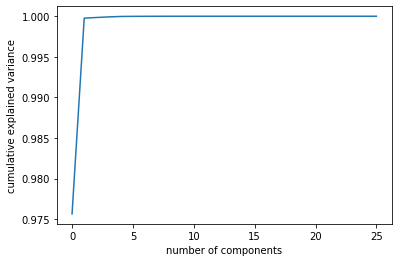

In [51]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [62]:
ncomp = 22
pca = PCA(n_components=ncomp)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

In [63]:
ncomp = 10
pknn = Pipeline([('scl', StandardScaler()), ('rgs', KNeighborsClassifier(n_neighbors=3))])
pknnpca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', KNeighborsClassifier(n_neighbors=3))])
ptree = Pipeline([('scl', StandardScaler()), ('rgs', DecisionTreeClassifier())])
psgdr = Pipeline([('scl', StandardScaler()), ('rgs', SGDClassifier())])
ptreepca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', DecisionTreeClassifier())])
psgdrpca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=ncomp)), ('rgs', SGDClassifier())])

pipelines = [pknn, pknnpca, ptree,ptreepca, psgdr, psgdrpca]

pipe_names = {0:"Knn", 1:"Knn PCA", 2:"Tree", 3:"Tree PCA", 4:"SGDR", 5:"SGDR PCA"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

print("    Test Accuracy\n")
scores = []
for idx, val in enumerate(pipelines):
    sc = val.score(X_test, y_test)
    scores.append(sc)
    print("%s: %.3f" % (pipe_names[idx], sc))
    
max_ind = scores.index(max(scores))
print("\nRegression with best accuracy: ", pipe_names[max_ind])

    Test Accuracy

Knn: 0.921
Knn PCA: 0.895
Tree: 1.000
Tree PCA: 0.876
SGDR: 0.877
SGDR PCA: 0.793

Regression with best accuracy:  Tree


In [54]:
pknnpca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', KNeighborsClassifier(n_neighbors=3))])
ptreepca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', DecisionTreeClassifier())])
psgdrpca = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('rgs', SGDClassifier())])

pipelines = [pknnpca, ptreepca, psgdrpca]

pipe_names = {0:"Knn PCA", 1:"Tree PCA", 2:"SGDR PCA"}

param_dict = {"pca__n_components":[10, 26]}

for pipe in pipelines:
    estimator = GridSearchCV(pipe, param_dict)
    #pipe.fit(X_train, y_train)
    estimator.fit(X_train, y_train)
    print(estimator.best_params_)

/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'pca__n_components': 26}


/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'pca__n_components': 26}


/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'pca__n_components': 26}


#### Resultados
* Aplicando o GridSearch no parâmetro de número de componentes do PCA, é obtido como melhor valor o número máximo de atributos n_components = 26.

* Neste caso, um número muito menor de atributos influencia na acurácia final do problema. Acurácia com cerca de 10% abaixo à utilização da técnica sem aplicar o PCA.